In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedShuffleSplit

import pickle
import time

# IMPORT

In [14]:
# df = pickle.load(open('processed_df\preprocessed_nlp_5p.pkl','rb'))
# df.head()

df = pd.read_csv('processed_df\preprocessed_nlp_5p.csv')
df.head()

ValueError: unsupported pickle protocol: 5

In [7]:
df.shape

(260269, 3)

In [8]:
df_sub = df.sample(n=2000, random_state=2333)

In [9]:
df_sub.Userscore.value_counts(normalize=True).sort_index()

1.0     0.0295
2.0     0.0210
3.0     0.0265
4.0     0.0350
5.0     0.0355
6.0     0.0560
7.0     0.0695
8.0     0.1090
9.0     0.2045
10.0    0.4135
Name: Userscore, dtype: float64

# Train test split

In [10]:
X = df_sub['Comment']
y = df_sub['Userscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# XGBoost

- baseline

In [44]:
steps = [('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)), ('XGBoost', XGBRegressor())]
xgb_pipeline = Pipeline(steps)

In [45]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)),
                ('XGBoost', XGBClassifier(objective='multi:softprob'))])

In [46]:
y_pred = xgb_pipeline.predict(X_test)
xgb_pipeline.score

- some man tuning

In [58]:
steps = [('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)), ('XGBoost', XGBClassifier(learning_rate=1, subsample=0.8))]
xgb_pipeline = Pipeline(steps)

In [59]:
xgb_pipeline.fit(transformed_tr, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)),
                ('XGBoost',
                 XGBClassifier(learning_rate=1, objective='multi:softprob',
                               subsample=0.8))])

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00        26
         5.0       0.00      0.00      0.00        21
         6.0       0.00      0.00      0.00        33
         7.0       0.00      0.00      0.00        35
         8.0       0.11      0.05      0.07        64
         9.0       0.31      0.19      0.24       131
        10.0       0.47      0.90      0.61       243

    accuracy                           0.41       600
   macro avg       0.09      0.11      0.09       600
weighted avg       0.27      0.41      0.31       600



c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


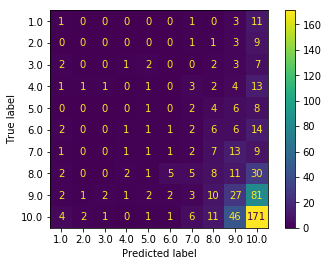

In [60]:
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_pipeline, transformed_te, y_test)